<a href="https://colab.research.google.com/github/SandeepH2706/IITM_MLT/blob/main/Week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week-7

Decision trees and KNN

In [26]:
### Solution ###
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import warnings
from collections import Counter


In [27]:
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['font.size'] = 15

## Decision Trees

**Decision stumps**

A decision stump is a decision tree that has a single question at the root node which splits into two leaf nodes. A decision stump partitions the dataset based on a single question: $f_k < \theta$. This is therefore the simplest decision tree that we can come up with.

---
Use the following decision stump for problems 1 and 3: The root has $1000$ data-points out of which $200$ belong to class-1. The left child-node has $100$ data-points out of which $50$ belong to class-1.

### Problem-1

Write a function `entropy` that accepts the proportion of points that belong to class-1 in a node as argument and returns the entropy. Use $\log_2$ for all computations.

Use this function to compute the entropy of the parent node.

In [28]:
### Solution ###
# Plot settings
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['font.size'] = 15

# Function to compute entropy given the proportion `p` of class-1 points
def entropy(p):
    """
    Compute binary entropy given the proportion of class-1 points.

    Parameters:
    p (float): proportion of points belonging to class-1. Must be between 0 and 1.

    Returns:
    float: entropy value
    """
    if p == 0 or p == 1:
        return 0
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

# Example: compute entropy of a parent node with 40% class-1 points
p_class1 = 0.4
parent_entropy = entropy(p_class1)

print(f"Entropy of parent node with p = {p_class1}: {parent_entropy:.4f}")


Entropy of parent node with p = 0.4: 0.9710


### Problem-2

Plot the entropy of a node as a function of $p$, the proportion of data-points that belong to class $+1$.

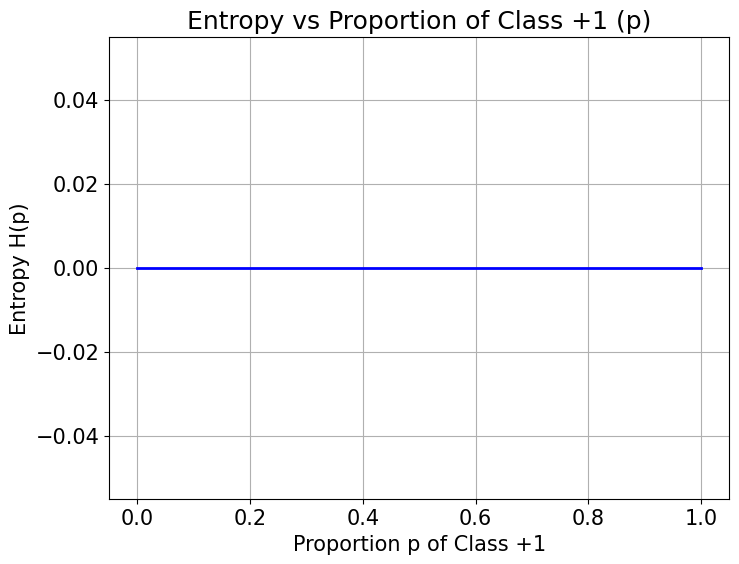

In [29]:
### Solution ###
# Plot settings
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['font.size'] = 15

# Entropy function
def entropy(p):
    if p == 0 or p == 1:
        return 0
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

# Vectorize the entropy function for array inputs
vec_entropy = np.vectorize(entropy)

# Generate p values between 0 and 1
p_values = np.linspace(0, 1, 100)
entropy_values = vec_entropy(p_values)

# Plot
plt.plot(p_values, entropy_values, color='blue', linewidth=2)
plt.title('Entropy vs Proportion of Class +1 (p)')
plt.xlabel('Proportion p of Class +1')
plt.ylabel('Entropy H(p)')
plt.grid(True)
plt.show()


### Problem-3

Write a function `IG` that accepts the following arguments:

- `E`: entropy of the parent node `Q`
- `El`: entropy of the left child `L`
- `Er`: entropy of the right child `R`
- `gamma`: proportion of data-points in left child

Use this function to compute the information gain for the parent node.

In [30]:
### Solution ###
# Function to compute Information Gain
def IG(E, El, Er, gamma):
    """
    Compute Information Gain.

    Parameters:
    E (float): entropy of parent node
    El (float): entropy of left child
    Er (float): entropy of right child
    gamma (float): proportion of data points in left child (0 <= gamma <= 1)

    Returns:
    float: information gain
    """
    return E - (gamma * El + (1 - gamma) * Er)

# Example values
E_parent = entropy(0.5)      # Parent entropy (max uncertainty)
E_left = entropy(0.2)        # Left child entropy (more pure)
E_right = entropy(0.8)       # Right child entropy (more pure)
gamma = 0.6                  # 60% of data went to left child

# Compute Information Gain
info_gain = IG(E_parent, E_left, E_right, gamma)
print(f"Information Gain: {info_gain:.4f}")


Information Gain: 0.2781


### Problem-4

Consider a decision stump with $1000$ data-points. Call the root node $Q$ and the left and right leaf nodes $L$ and $R$.

- The proportion of data-points that belong to class $+1$ in $Q$ is equal to $0.4$
- The proportion of points in the left node is equal to $0.7$, that is, $\gamma = 0.7$
-  $q$ is the proportion of data-points that belong to class $+1$ in $L$

What are the minimum ($q_{\min}$) and maximum ($q_{\max}$) values of $q$?

In [31]:
### Solution ###
# Total data points
total_points = 1000

# Proportion of class +1 in the parent node Q
p_Q = 0.4
total_pos = int(p_Q * total_points)  # Number of class +1 points = 400

# Proportion of data points going to the left node L
gamma = 0.7
left_points = int(gamma * total_points)   # 700
right_points = total_points - left_points # 300

# Maximum class +1 points that can go to right node = 300
# So minimum that must go to left = 400 - 300 = 100
min_pos_left = max(0, total_pos - right_points)  # = 100

# Maximum class +1 that can go to left = min(400, 700) = 400
max_pos_left = min(total_pos, left_points)       # = 400

# Compute qmin and qmax
qmin = min_pos_left / left_points    # 100 / 700
qmax = max_pos_left / left_points    # 400 / 700

print(f"Minimum value of q (qmin): {qmin:.4f}")
print(f"Maximum value of q (qmax): {qmax:.4f}")


Minimum value of q (qmin): 0.1429
Maximum value of q (qmax): 0.5714


### Problem-5

Using the above information, plot the information gain of the root as a function of $q$, where $q \in [q_{\min}, q_{\max}]$. Record at least two interesting observations.

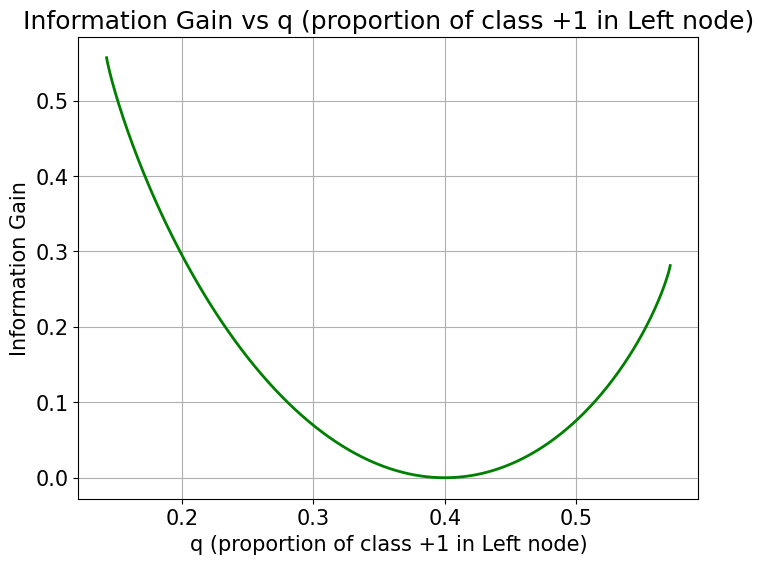

In [32]:
### Solution ###
# Entropy function
def entropy(p):
    if p == 0 or p == 1:
        return 0
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

# Information Gain function
def IG(E, El, Er, gamma):
    return E - (gamma * El + (1 - gamma) * Er)

# Constants
total_points = 1000
total_pos = int(0.4 * total_points)  # 400 class +1
gamma = 0.7
left_points = int(gamma * total_points)    # 700
right_points = total_points - left_points  # 300

# q range
qmin = (total_pos - right_points) / left_points  # 100/700 = 0.1429
qmax = total_pos / left_points                   # 400/700 = 0.5714
q_values = np.linspace(qmin, qmax, 500)

# Parent entropy
E_parent = entropy(0.4)

# Compute IG for each q
ig_values = []
for q in q_values:
    # Left child
    El = entropy(q)

    # Right child: remaining +1s are (400 - 700*q), out of 300
    right_pos = total_pos - left_points * q
    pr = right_pos / right_points
    Er = entropy(pr)

    # Compute IG
    ig = IG(E_parent, El, Er, gamma)
    ig_values.append(ig)

# Plot
plt.figure(figsize=(8,6))
plt.plot(q_values, ig_values, color='green', linewidth=2)
plt.title('Information Gain vs q (proportion of class +1 in Left node)')
plt.xlabel('q (proportion of class +1 in Left node)')
plt.ylabel('Information Gain')
plt.grid(True)
plt.show()


### Problem-6

We will work with the dataset `X` for the next five problems. Visualize the data using a scatter plot. Color the points that belong to class $+1$ using "green" and those that belong to class $0$ using "red".

In [33]:
### Data ###
### DO NOT CHANGE THE CONTENTS OF THIS CELL ###
rng = np.random.default_rng(seed = 1001)
n_per = 50
cov = np.eye(2) / 10
X1 = rng.multivariate_normal([1, 1], cov, n_per)
y1 = np.ones(n_per)
X2 = rng.multivariate_normal([5, 3], cov , n_per)
y2 = np.zeros(n_per)
X3 = rng.multivariate_normal([3, 4], cov, n_per)
y3 = np.ones(n_per)
X4 = rng.multivariate_normal([3, 2], cov, n_per)
y4 = np.zeros(n_per)
X = np.concatenate((X1, X2, X3, X4), axis = 0)
y = np.int64(np.concatenate((y1, y2, y3, y4)))
### DO NOT CHANGE THE CONTENTS OF THIS CELL ###

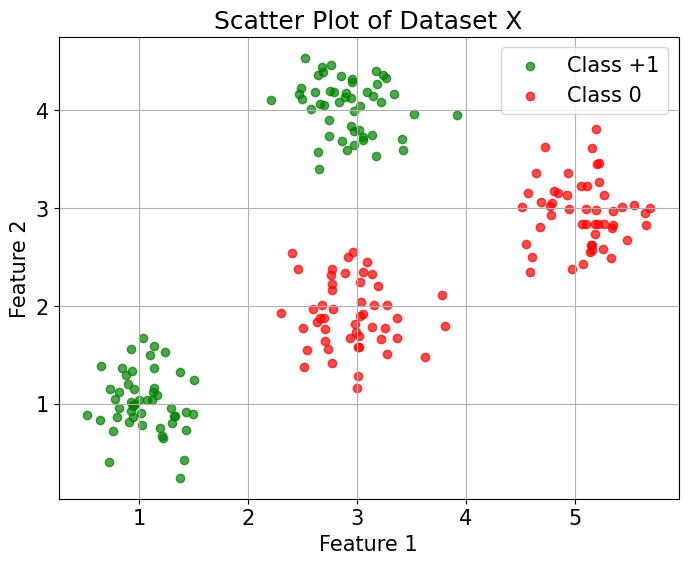

In [34]:
### Solution ###

# Plotting
plt.figure(figsize=(8, 6))

# Class +1 points (green)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='green', label='Class +1', alpha=0.7)

# Class 0 points (red)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0', alpha=0.7)

plt.title('Scatter Plot of Dataset X')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

### Problem-7

If you were to use a decision stump as a classifier:

- What is the best question $f_k < \theta$?
    - enter the feature index, $k$ (use zero-indexing)
    - enter the value of $\theta$
- What is the information gain for this question?

---

Write the function named `best_split` to solve this problem:

The function should accept the feature matrix `X` and the label vector `y` as arguements. It should return the tuple `(feat_best, value_best, ig_best)`.

In [35]:
### Solution ###
def entropy(p):
    if p == 0 or p == 1:
        return 0
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

def IG(E, El, Er, gamma):
    return E - (gamma * El + (1 - gamma) * Er)

def best_split(X, y):
    n, d = X.shape
    E_parent = entropy(np.mean(y))  # Proportion of class +1 in root

    ig_best = -np.inf
    feat_best = None
    value_best = None

    for k in range(d):  # for each feature
        # Try all unique midpoints between sorted feature values
        xk_sorted = np.sort(np.unique(X[:, k]))
        thetas = (xk_sorted[:-1] + xk_sorted[1:]) / 2

        for theta in thetas:
            # Split data
            left_mask = X[:, k] < theta
            right_mask = ~left_mask

            if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                continue  # skip invalid splits

            y_left = y[left_mask]
            y_right = y[right_mask]

            p_left = np.mean(y_left)
            p_right = np.mean(y_right)

            El = entropy(p_left)
            Er = entropy(p_right)

            gamma = len(y_left) / n

            ig = IG(E_parent, El, Er, gamma)

            if ig > ig_best:
                ig_best = ig
                feat_best = k
                value_best = theta

    return feat_best, value_best, ig_best


In [36]:
feat_best, value_best, ig_best = best_split(X, y)
print(f"Best feature index (k): {feat_best}")
print(f"Best threshold (θ): {value_best:.4f}")
print(f"Information Gain: {ig_best:.4f}")


Best feature index (k): 0
Best threshold (θ): 2.2535
Information Gain: 0.3193


### Problem-8

Grow a decision tree for this problem. You may have to use two programming concepts:

- recursion
- binary trees

Once you have grown the tree, answer the following questions:

- How many internal nodes does your tree have?
- How many leaf nodes does it have?

In [37]:
### Solution ###
class TreeNode:
    def __init__(self, feature=None, threshold=None, left=None, right=None, prediction=None):
        self.feature = feature        # feature index to split on
        self.threshold = threshold    # threshold for split
        self.left = left              # left child
        self.right = right            # right child
        self.prediction = prediction  # class label if leaf

    def is_leaf(self):
        return self.prediction is not None

# Reuse entropy and best_split functions from previous cells
def grow_tree(X, y):
    # Base case: pure node
    if np.all(y == y[0]):
        return TreeNode(prediction=int(y[0]))

    # If best IG is very small or cannot split, stop
    feat, thresh, ig = best_split(X, y)
    if feat is None or ig <= 1e-5:
        # Majority class
        pred = int(np.round(np.mean(y)))
        return TreeNode(prediction=pred)

    # Split and grow children
    left_mask = X[:, feat] < thresh
    right_mask = ~left_mask

    left_child = grow_tree(X[left_mask], y[left_mask])
    right_child = grow_tree(X[right_mask], y[right_mask])

    return TreeNode(feature=feat, threshold=thresh, left=left_child, right=right_child)

# Count internal and leaf nodes
def count_nodes(node):
    if node.is_leaf():
        return (0, 1)  # (internal, leaf)
    left_counts = count_nodes(node.left)
    right_counts = count_nodes(node.right)
    internal = 1 + left_counts[0] + right_counts[0]
    leaf = left_counts[1] + right_counts[1]
    return (internal, leaf)


In [38]:
tree_root = grow_tree(X, y)
internal_nodes, leaf_nodes = count_nodes(tree_root)

print(f"Internal nodes: {internal_nodes}")
print(f"Leaf nodes: {leaf_nodes}")


Internal nodes: 3
Leaf nodes: 4


### Problem-9

Predict the label of the point $(3, 4)$.

In [39]:
### Solution ###
def predict(tree, x):
    """
    Predict the class label for a single input point x using the decision tree.

    Parameters:
    - tree: root TreeNode of the decision tree
    - x: 1D numpy array of shape (2,) representing a point (e.g., [3, 4])

    Returns:
    - int: predicted class label (0 or 1)
    """
    node = tree
    while not node.is_leaf():
        if x[node.feature] < node.threshold:
            node = node.left
        else:
            node = node.right
    return node.prediction


In [40]:
point = np.array([3, 4])
label = predict(tree_root, point)
print(f"Predicted label for point (3, 4): {label}")


Predicted label for point (3, 4): 1


### Problem-10

Plot the decision boundary.

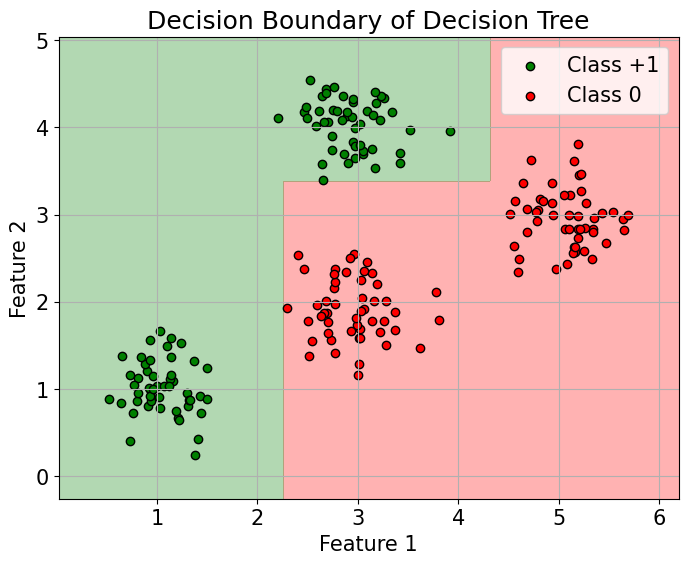

In [41]:
### Solution ###
# Reuse grow_tree, TreeNode, best_split, entropy, IG, and predict from earlier

# Step 1: Train the decision tree
tree_root = grow_tree(X, y)

# Step 2: Create meshgrid over feature space
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Step 3: Predict class for each point in the grid
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([predict(tree_root, point) for point in grid_points])
Z = Z.reshape(xx.shape)

# Step 4: Plot
plt.figure(figsize=(8, 6))

# Background: decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, levels=[-0.1, 0.5, 1.1], colors=['red', 'green'])

# Foreground: original points
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='green', label='Class +1', edgecolor='k')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0', edgecolor='k')

plt.title('Decision Boundary of Decision Tree')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


## KNN


In [48]:
### Data ###
### DO NOT EDIT THIS CELL ###
rng = np.random.default_rng(seed = 1001)
X = rng.uniform(-10, 10, (100, 2))
y = np.int32(np.zeros(X.shape[0]))
y[X[:, 1] > X[:, 0]] = 1
X = np.concatenate((X,
                   rng.multivariate_normal([-5, 5], np.eye(2), 10)),
                   axis = 0)
y = np.concatenate((y, np.int32(np.zeros(10))))
### DO NOT EDIT THIS CELL ###

### Problem-11

Visualize the data using a scatter plot. Use red for class $0$ and green for class $1$.

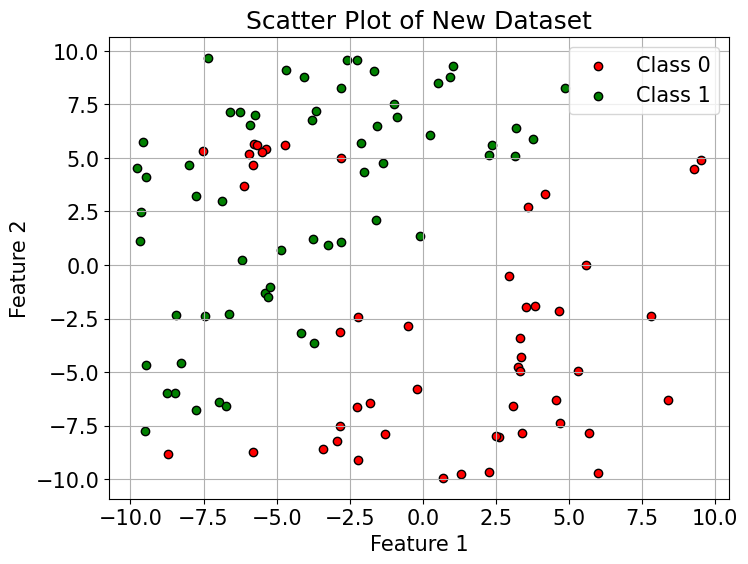

In [43]:
### Solution ###
# Provided data (do not edit)
rng = np.random.default_rng(seed=1001)
X = rng.uniform(-10, 10, (100, 2))
y = np.int32(np.zeros(X.shape[0]))
y[X[:, 1] > X[:, 0]] = 1
X = np.concatenate((X,
                   rng.multivariate_normal([-5, 5], np.eye(2), 10)),
                   axis=0)
y = np.concatenate((y, np.int32(np.zeros(10))))

# Scatter plot
plt.figure(figsize=(8, 6))

# Class 0 (red)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0', edgecolor='k')

# Class 1 (green)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='green', label='Class 1', edgecolor='k')

plt.title('Scatter Plot of New Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.legend()
plt.show()


### Problem-12

Write a function `predict` that accepts the following arguments:

- `X` - feature matrix
- `y` - label vector
- `x_test` - test data-point
- `k` - number of neighbors

The function should return the prediction for the point `x_test`. Use this function to compute the predicted label for the point $(-3, -2)$ with $k = 10$.

In [49]:
### Solution ###
def predict(X, y, x_test, k):
    """
    Predict the class label of x_test using k-NN.

    Parameters:
    X : numpy.ndarray
        Feature matrix of shape (n_samples, n_features)
    y : numpy.ndarray
        Label vector of shape (n_samples,)
    x_test : numpy.ndarray or list or tuple
        Test data point of shape (n_features,)
    k : int
        Number of neighbors to use

    Returns:
    int
        Predicted class label for x_test
    """
    # Compute Euclidean distances from x_test to all training points
    distances = np.linalg.norm(X - x_test, axis=1)

    # Get indices of the k closest points
    nearest_indices = np.argsort(distances)[:k]

    # Extract the labels of the k nearest neighbors
    nearest_labels = y[nearest_indices]

    # Majority vote
    label_count = Counter(nearest_labels)
    prediction = label_count.most_common(1)[0][0]

    return prediction


In [50]:
# Test point
x_test = np.array([-3, -2])
k = 10

# Predict label
label = predict(X, y, x_test, k)
print(f"Predicted label for point (-3, -2) with k=10: {label}")


Predicted label for point (-3, -2) with k=10: 1


### Problem-13

Plot the decision boundary for different values of $k$:

- $k = 1$
- $k = 3$
- $k = 7$
- $k = 15$
- $k = 31$
- $k = 63$

Record at least two observations.

In [51]:
# Set up the data (as provided)
rng = np.random.default_rng(seed=1001)
X = rng.uniform(-10, 10, (100, 2))
y = np.int32(np.zeros(X.shape[0]))
y[X[:, 1] > X[:, 0]] = 1
X = np.concatenate((X, rng.multivariate_normal([-5, 5], np.eye(2), 10)), axis=0)
y = np.concatenate((y, np.int32(np.zeros(10))))

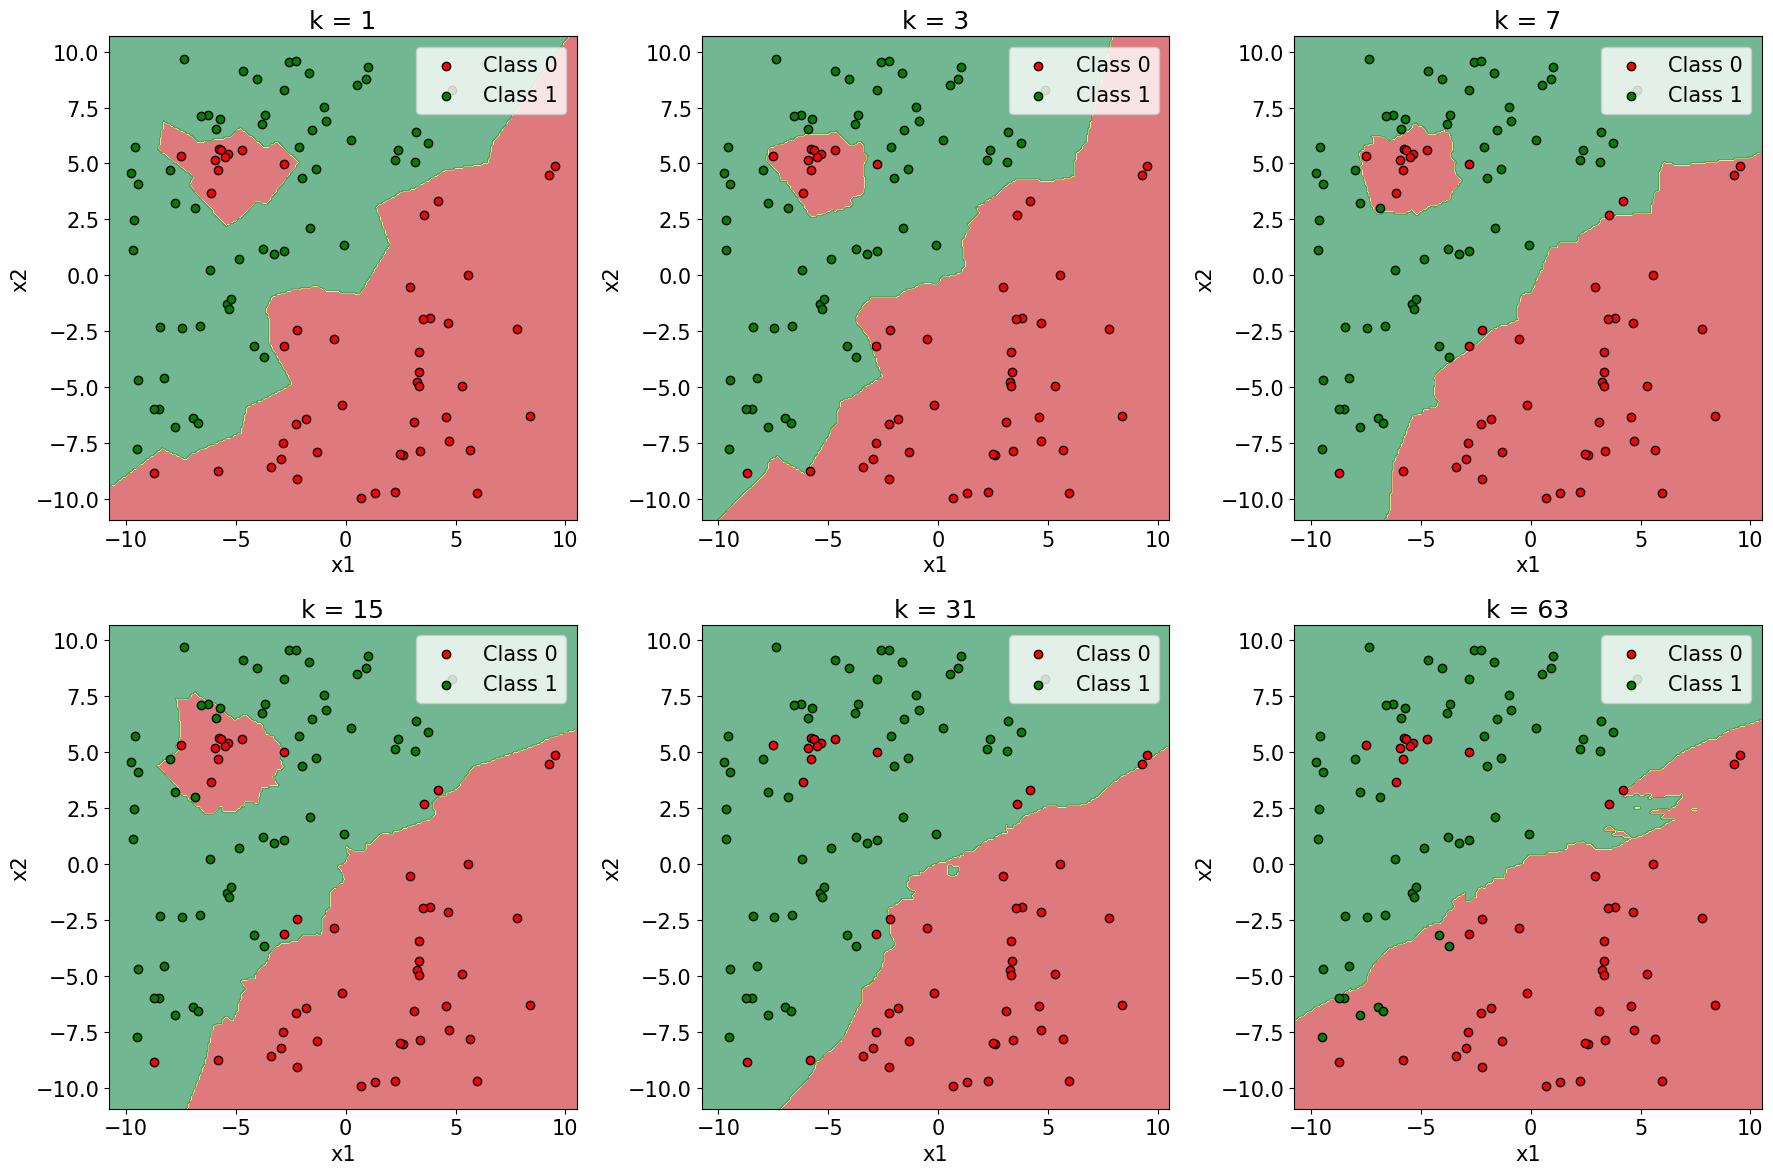

In [52]:
# Create mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# List of k values
k_values = [1, 3, 7, 15, 31, 63]

# Plotting
plt.figure(figsize=(18, 12))

for i, k in enumerate(k_values, 1):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)

    # Predict on the mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.subplot(2, 3, i)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.6)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='red', label='Class 0', edgecolor='k')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='green', label='Class 1', edgecolor='k')
    plt.title(f'k = {k}')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()

plt.tight_layout()
plt.show()
